In [23]:
!python -V

Python 3.9.12


In [24]:
import pandas as pd

In [25]:
import pickle

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [29]:

df = pd.read_parquet('data/fhv_tripdata_2021-01.parquet')
df.shape

(1154112, 7)

In [30]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.00000,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.00000,None,B00037


In [31]:

df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [32]:
df['duration'].describe()

count   1154112.00000
mean         19.16722
std         398.69216
min           0.01667
25%           7.76667
50%          13.40000
75%          22.28333
max      423371.05000
Name: duration, dtype: float64

/Users/diegofernandezgil/anaconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

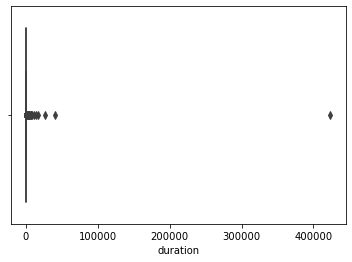

In [33]:
sns.boxplot(df['duration'])


In [34]:

original_len = len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]


current_len = len(df)

/Users/diegofernandezgil/anaconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

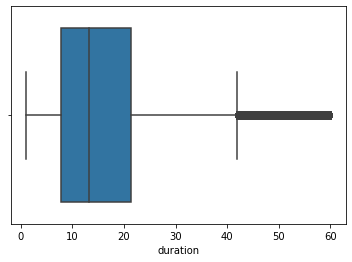

In [35]:
sns.boxplot(df['duration'])


In [36]:
original_len - current_len


44286

In [37]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
duration                         float64
dtype: object

In [44]:
df[features].fillna('-1', ).astype(str).dtypes


PUlocationID    object
DOlocationID    object
dtype: object

In [45]:
features = ['PUlocationID', 'DOlocationID']
df[features] = df[features].fillna(-1).astype(str)


In [48]:
train_dicts = df[features].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)



In [49]:
X_train.shape


(1109826, 525)

In [50]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)


10.528519107206316

/Users/diegofernandezgil/anaconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegofernandezgil/anaconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


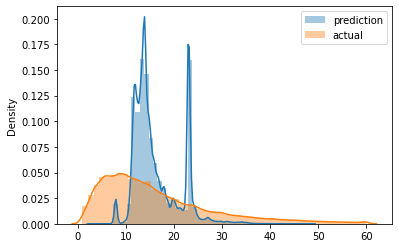

In [51]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [54]:
def read_dataframe(filename):
   
    df = pd.read_parquet(filename)


    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PUlocationID', 'DOlocationID']
    df[features] = df[features].fillna(-1).astype(str)
    
    return df

In [56]:
df_val = read_dataframe('data/fhv_tripdata_2021-02.parquet')


In [58]:
len(df_val)

990113

In [60]:
val_dicts = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [61]:
y_val = df_val[target].values

In [62]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014283149347039